In [20]:
# import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# download data
data = yf.download('WINS.JK', start='2010-01-01', end='2024-06-2')

[*********************100%***********************]  1 of 1 completed


In [51]:
# see the data
print(data.head(2))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-11-29  347.095367  488.866699  342.206696  347.095367  339.490845   
2010-11-30  307.986023  361.761353  303.097351  307.986023  301.238342   

               Volume  
Date                   
2010-11-29  456251664  
2010-11-30  164025282  


In [52]:
print(data.tail(2))

             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2024-05-30  520.0  520.0  500.0  510.0      510.0  3523900
2024-05-31  510.0  515.0  505.0  510.0      510.0  5774400


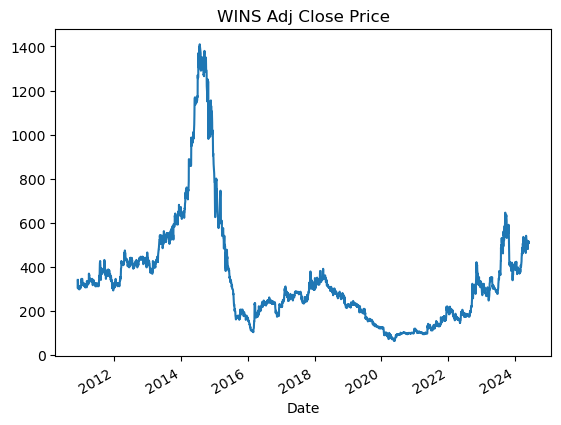

In [54]:
# plot the data with label
data['Adj Close'].plot()
plt.title('WINS Adj Close Price')
plt.show()

In [55]:
# wrap the code in a function with a view of the data
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    print(data.head(2))
    print(data.tail(2))
    data['Adj Close'].plot()
    plt.title(f'{ticker} Adj Close Price')
    plt.show()

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-11-29  347.095367  488.866699  342.206696  347.095367  339.490845   
2010-11-30  307.986023  361.761353  303.097351  307.986023  301.238342   

               Volume  
Date                   
2010-11-29  456251664  
2010-11-30  164025282  
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2024-05-30  520.0  520.0  500.0  510.0      510.0  3523900
2024-05-31  510.0  515.0  505.0  510.0      510.0  5774400


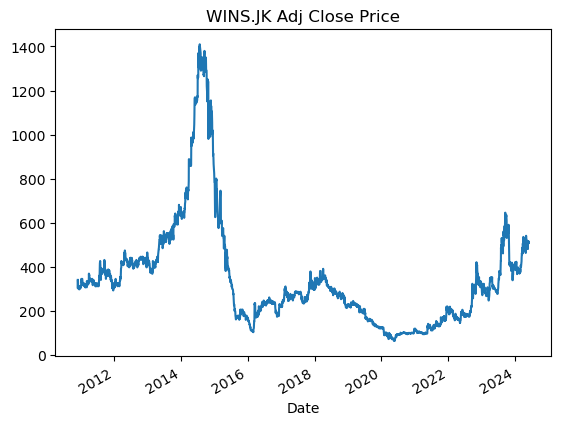

In [60]:
# test the function
download_data('WINS.JK', '2010-01-01', '2024-06-2')

In [62]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
# wrap the code in a function with a view of the data + indicator

def calculate_RSI(data, window):
    delta = data.diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0.0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0.0
    RS_up = up_days.rolling(window).mean()
    RS_down = down_days.rolling(window).mean()
    rsi = 100 - 100 / (1 + RS_up / RS_down)
    return rsi

def plot_stock_price(ticker_symbol):
    # Get the stock data
    ticker_data = yf.Ticker(ticker_symbol)
    
    # Get the historical prices for this ticker
    ticker_df = ticker_data.history(period='1d', start='2010-01-01', end='2024-06-22')
    
    # Calculate the moving average
    ticker_df['MA'] = ticker_df['Close'].rolling(window=200).mean()

    # Calculate the RSI
    ticker_df['RSI'] = calculate_RSI(ticker_df['Close'], 14)

    # Create a figure with two subplots (one for the stock price, one for the RSI)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Plot the Close price and the moving average on the first subplot
    ax1.set_title(f'{ticker_symbol} Stock Price and RSI from 2010 to 2024', fontsize=15)
    ax1.plot(ticker_df['Close'], label='Close Price', color='blue')
    ax1.plot(ticker_df['MA'], label='Moving Average (200 days)', color='red')
    ax1.legend(loc='upper left')
    ax1.grid()

    # Plot the RSI on the second subplot
    ax2.plot(ticker_df['RSI'], label='RSI (14 days)', color='orange')
    ax2.axhline(0, linestyle='--', alpha=0.1)
    ax2.axhline(20, linestyle='--', alpha=0.5)
    ax2.axhline(30, linestyle='--')
    ax2.axhline(70, linestyle='--')
    ax2.axhline(80, linestyle='--', alpha=0.5)
    ax2.axhline(100, linestyle='--', alpha=0.1)
    ax2.legend(loc='upper left')
    ax2.grid()

    # Set labels
    ax2.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax2.set_ylabel('RSI')

    # Show the plot
    plt.show()

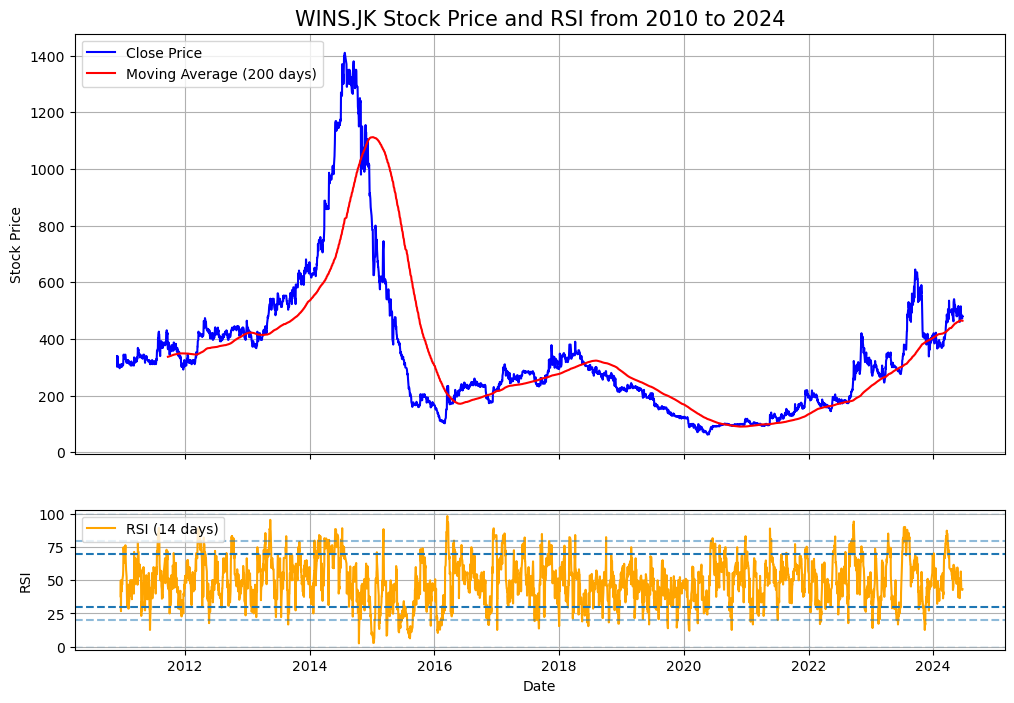

In [66]:
# Test the function
plot_stock_price("WINS.JK")